# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – To test the sensitivity of Van Genuchten parameters to the subsurface temperature and subsurface moisture data considering air temperature as the top boundary condition (Scenario IV). The sensitivity analysis with and without precipitation influence (snow and rain) can be tested. The VGc parameters (alpha, n, wr) for Peat, Mineral and Bedrock is varied [three to five simulations each]. The importance here is given to wr value!**

- T : 1 year (365 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017) **
- Note that the VGc properties of bedrock are less significant since they are mostly saturated.

- Parameters:
    - VGc - Peat: alpha – [1 - 0.0005, 2 - 0.001, 3 - 0.01, 4 - 0.02, 5 - 0.05], n – [1 - 1.05, 2 - 1.2, 3 - 1.4, 4 - 1.6, 5 - 2], wr = [1 - 0.05, 2 - 0.1, 3 - 0.12, 4 - 0.15, 5 - 0.2]
    - VGc - Mineral: alpha – [1 -2E-05, 2 - 2E-04, 3 - 2E-03, 4 - 0.007, 5 - 0.01], n – [1 - 1.05, 2 - 1.2, 3 - 1.4, 4 - 1.6, 5 - 2], wr = [1 - 0.05, 2 - 0.1, 3 - 0.12, 4 - 0.15, 5 - 0.2]
    - VGc - Bedrock: alpha – [1 - 0.001, 2 - 0.05,  3 - 0.1], n – [1 - 1.05, 2 - 1.5, 3 - 2, 4 - 2.5, 5 - 3], wr = [1 - 0.01, 2 - 0.05, 3 - 0.1]
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – 0.85, 1e-07 Pa^-1; Mineral – 0.5, 1e-08 Pa^-1;
    - Permeability: Peat – 5e-11 m^2, Mineral & Bedrock – 2e-13 m^2 
    - Density: Peat – 700 kg/m^3, Mineral & Bedrock – 2170 kg/m^3

**The standard VGc values (The values change based on the simulation):
    - Peat: alpha = 0.001, n = 1.4, sr = 0.1, smoothing_interval = 0.1
    - Mineral: alpha = 0.0002, n = 1.4, sr = 0.05, smoothing_interval = 0.1
    - Bedrock: alpha = 0.03, n = 2, sr = 0.05, smoothing_interval = 0.1
**

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1_B_IV_hyd_VGc.xml
    - Output folders (.demo file): 
        - Palpha/Case1_B_Hyd_VGc_Palpha[1-5].demo
        - Pn/Case1_B_Hyd_VGc_Pn[1-5].demo
        - Pwr/Case1_B_Hyd_VGc_Pwr[1-5].demo
        - Malpha/Case1_B_Hyd_VGc_Malpha[1-5].demo
        - Mn/Case1_B_Hyd_VGc_Mn[1-5].demo
        - Mwr/Case1_B_Hyd_VGc_Mwr[1-5].demo
        - Balpha/Case1_B_Hyd_VGc_Balpha[1-5].demo
        - Bn/Case1_B_Hyd_VGc_Bn[1-5].demo
        - Bwr/Case1_B_Hyd_VGc_Bwr[1-5].demo

- Expected results: Since we are not considering the precipitation input at the top, we might not observe significant changes with respect to the VGc properties. However, during the thawing season there is a release of water due to which the change in the parameters might significantly affect the results in the upper layers [Peat and mineral layer]. The changes might be as follows:
    - alpha : As alpha value increases, the capillary fringe activity decreases [as alpha increases it moves from clay to sand] --> the soil water withholding capacity reduces --> hence there is greater moisture flow (might be observed in subsurface moisture data) --> as moisture increases, the temperature might also increase [What about s_i ? --> Claypeyron equation]. **alpha ↑ --> s_l ↓ (hard to say) --> T ↓**
    - n : n value defines the soil degradation. As n value increases, the soil moves from loam [mixture of sand, clay, and silt] to single sized particles [just clay, sand or silt]. As 'n' value increases, soil moisture flow becomes easier [as capillary pressure reduces]. With the increase in 'n', probably the saturation of liquid decreases at a faster rate. Probably  the temperature might also decrease. **n ↑ --> s_l ↓ (hard to say) --> T ↓**  
    - wr : wr defines the amount of water that is retained in the soil. **wr ↑ --> s_l ↑ (hard to say) --> T ↑**
    
### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  



#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | - |
| Thermal                                                            |  270.15 K (-3 °C)   |  BCTopAiractualT = actual daily air temperature (2017) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.001 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.4 |
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.1 |
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.1 |
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0002 |
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.4 |
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05 |
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.1 |
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock | 0.03 |
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock | 2 |
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock | 0.05 |
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |0.1 |
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:

- Dataset: Air temperature at 5 m prepared in the notebook - /home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/**AWS_final_metdata_2015_20.ipynb
- Xml file: **Case1_B_IV_hyd_VGc.xml**
- Output folders (.demo file): 
        - Palpha/Case1_B_Hyd_VGc_Palpha[1-5].demo
        - Pn/Case1_B_Hyd_VGc_Pn[1-5].demo
        - Pwr/Case1_B_Hyd_VGc_Pwr[1-5].demo
        - Malpha/Case1_B_Hyd_VGc_Malpha[1-5].demo
        - Mn/Case1_B_Hyd_VGc_Mn[1-5].demo
        - Mwr/Case1_B_Hyd_VGc_Mwr[1-5].demo
        - Balpha/Case1_B_Hyd_VGc_Balpha[1-5].demo
        - Bn/Case1_B_Hyd_VGc_Bn[1-5].demo
        - Bwr/Case1_B_Hyd_VGc_Bwr[1-5].demo

## Workflow:
1. Importing all the modules & naming the directories
2. Plotting the input data and the VGc parameters 
3. Plotting the observation results.
4. Comparing the simulation results with the measurements
5. Finding the RMSE value - yearly average and monthly average for a single group of change in parameters [Ex: Palpha[1-5]]
6. Comparison - Plotting the RMSE values yearly and monthly 

## Final Results:
- The values of n appear to be sensitive to both the temperature and moisture. 
- n_p = 1.6, n_m = 1.2 - 2.0, n_b = 2.0

### 1. Importing all the modules & naming the directories

In [259]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg

In [260]:
import warnings
warnings.filterwarnings('ignore')

In [261]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc


In [262]:
# Output file directories:
#soil_names = ['P','M','B']

params = ['alpha','n','wr']
sim_number = [1,2,3,4,5]

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/P{params[j]}/Case1_B_IV_Hyd_VGc_P{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/P{params[j]}/Case1_B_IV_Hyd_VGc_P{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"P"+str(params[j])+str(sim_number[k])] = f'P{params[j]}/Case1_B_IV_Hyd_VGc_P{params[j]}{sim_number[k]}.dat'
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/M{params[j]}/Case1_B_IV_Hyd_VGc_M{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/M{params[j]}/Case1_B_IV_Hyd_VGc_M{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"M"+str(params[j])+str(sim_number[k])] = f'M{params[j]}/Case1_B_IV_Hyd_VGc_M{params[j]}{sim_number[k]}.dat'
        
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/B{params[j]}/Case1_B_IV_Hyd_VGc_B{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/B{params[j]}/Case1_B_IV_Hyd_VGc_B{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"B"+str(params[j])+str(sim_number[k])] = f'B{params[j]}/Case1_B_IV_Hyd_VGc_B{params[j]}{sim_number[k]}.dat'

In [263]:
# Output directory name & input xml file name:
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/Case1_B_IV_Hyd_VGc.xml'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'
input_data_file_name = 'Data/Yakou_data_2017.h5'

### 2. Plotting the input data

In [264]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    precip_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    snowprecip_2017_5yrs = np.array(hdf.get('precipitation snow [m SWE s^-1]'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




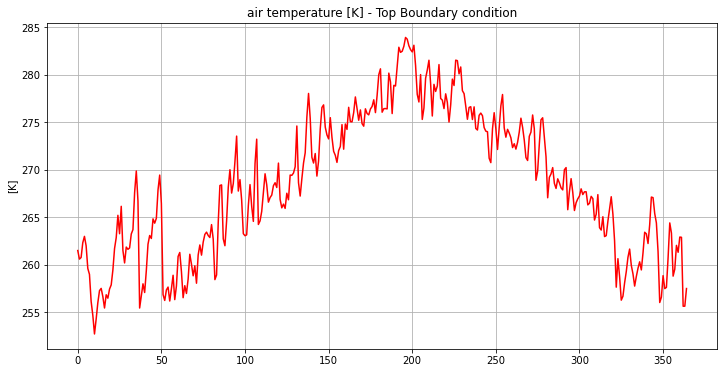

In [130]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

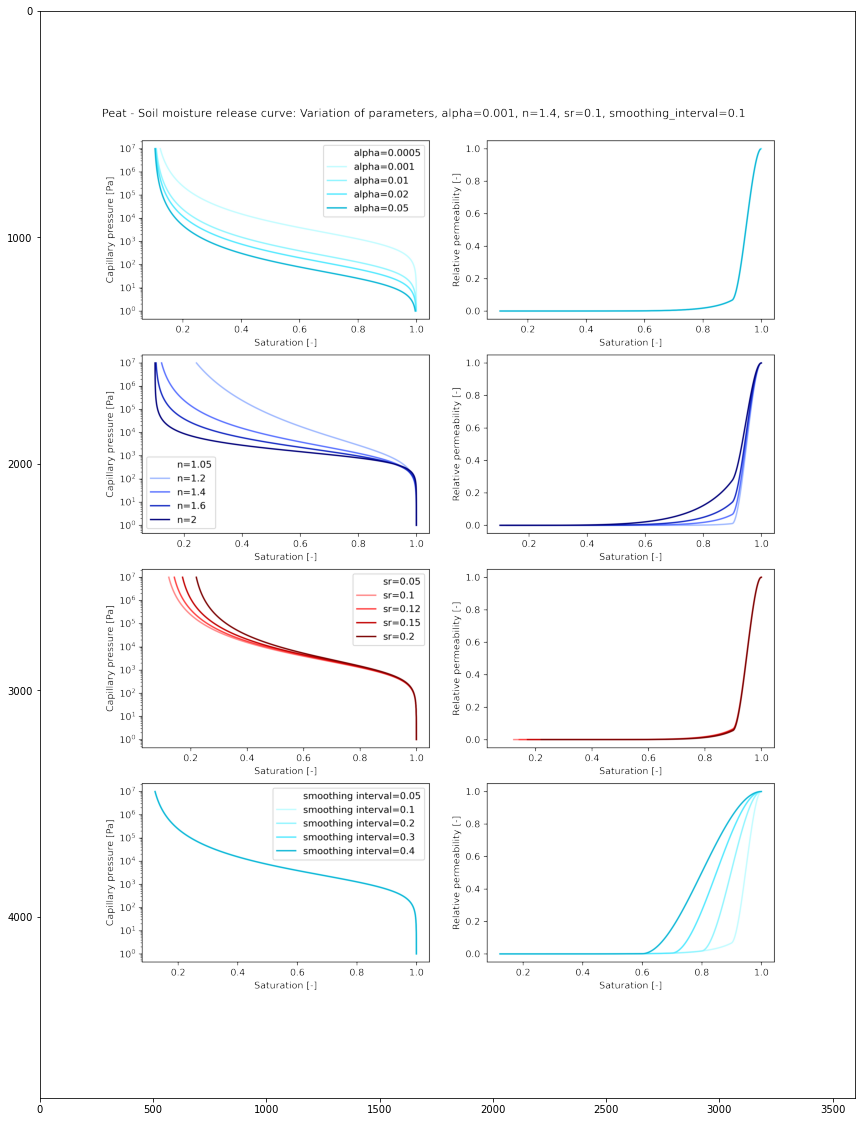

In [131]:
# Reading the VGc images
img_peat = mpimg.imread('figures/SWCC_variation_params_peat.png')
img_mineral = mpimg.imread('figures/SWCC_variation_params_mineral.png')
img_bedrock = mpimg.imread('figures/SWCC_variation_params_bedrock.png')
# Change the image files if required!
plt.figure(figsize=(20, 20))
plt.imshow(img_peat)

#### 5. Plotting the observation results:

In [132]:
# Looping over the file names:

# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_P'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_M'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
                    
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_B'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        


*Maybe we can combine the above and below cell*

In [133]:
# Reading the csv file and adjusting the index to the required time format
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.85 # Peat layer until 0.385
porosity_mineral = 0.5 # Mineral layer until 
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_P'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_P'+ str(params[j]) + str(sim_number[k])].index = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_M'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_M'+ str(params[j]) + str(sim_number[k])].index = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_B'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_B'+ str(params[j]) + str(sim_number[k])].index = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

#df_observation.head()

#### Plotting the values - An example:
- An example:
##### 1. Subsurface temperature

In [135]:
df_observation = df_Bn5.copy()

### Plotting temperature, saturation of liquid, and saturation of ice

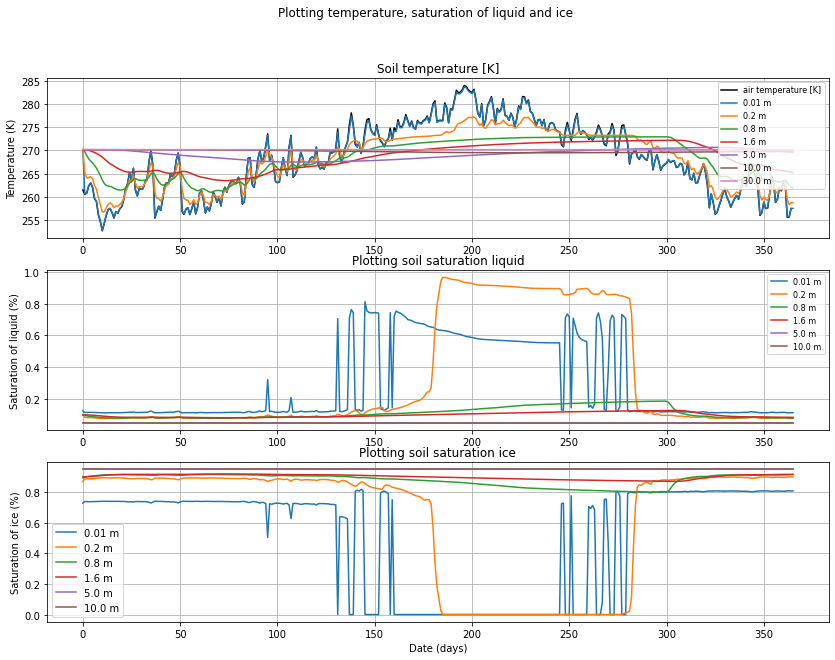

In [136]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
#ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
#ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

##### Plotting the temperature for different alpha values at different depths

Text(0, 0.5, 'Temperature (K)')

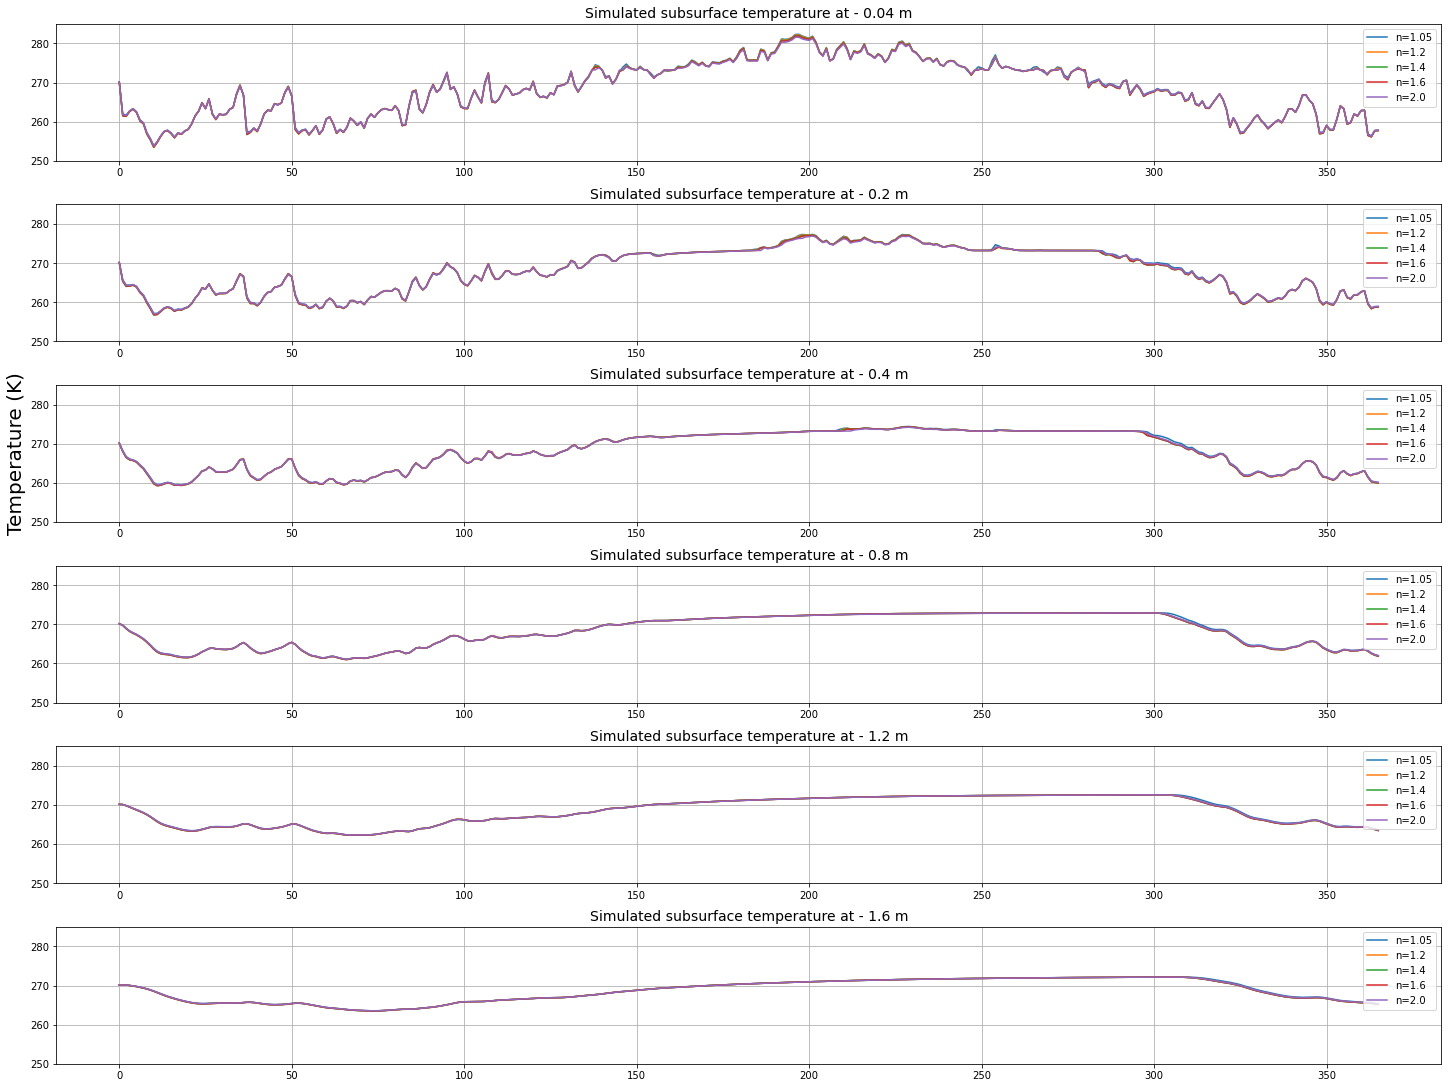

In [174]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')

P_n_values = [1.05, 1.2, 1.4, 1.6, 2.0]

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(P_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Pn{i+1}"][f'point -{depth} temperature [K]'], label=f'n={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

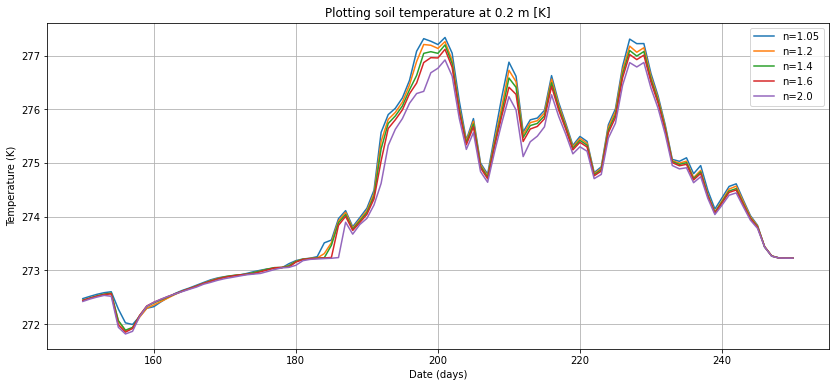

In [175]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(14,6))
plt.title('Plotting soil temperature at 0.2 m [K]')


for i, values in enumerate(P_n_values):
    plt.plot(locals()[f"df_Pn{i+1}"]['point -0.2 temperature [K]'][150:250], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### Comments:

##### Plotting the subsurface moisture for different alpha values at different depths

Text(0, 0.5, 'Saturation of liquid (%)')

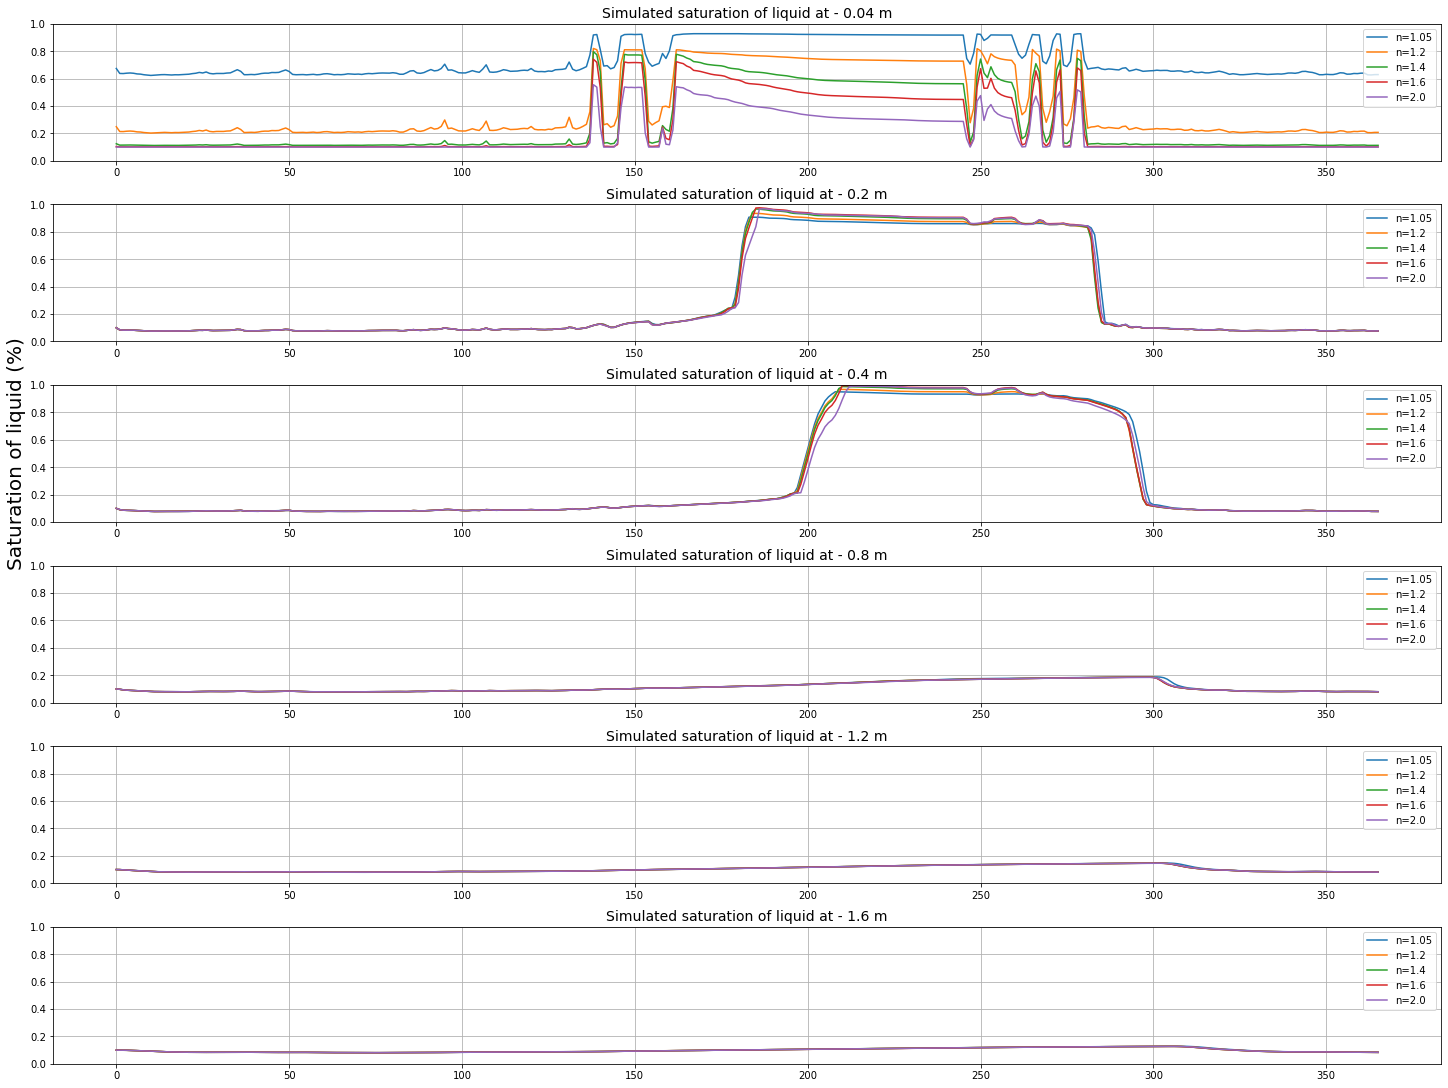

In [176]:
### Plotting the subsurface moisture for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(P_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Pn{i+1}"][f'point -{depth} saturation liquid'], label=f'n={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated saturation of liquid at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,1.0)
    

f2_ax3.set_ylabel('Saturation of liquid (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

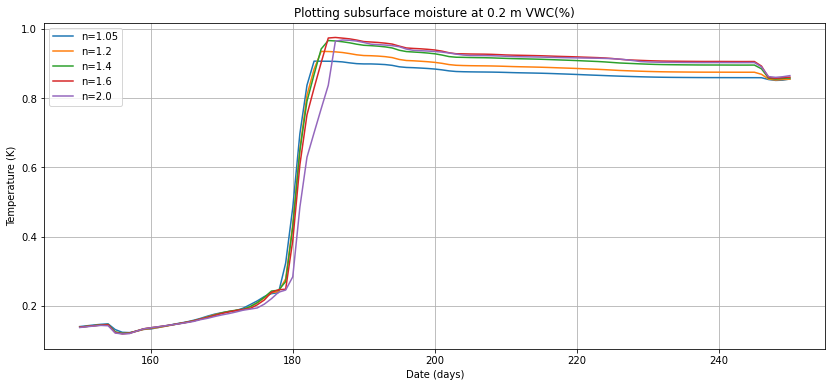

In [177]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(14,6))
plt.title('Plotting subsurface moisture at 0.2 m VWC(%)')


for i, values in enumerate(P_n_values):
    plt.plot(locals()[f"df_Pn{i+1}"]['point -0.2 saturation liquid'][150:250], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### Comments:


### 7. Comparing the simulation results with the measurements
- The measurement data is evaluated in the file 'AWS_final_metdata_2015_20.ipynb' - To get a better overview, view this Jupyter Notebook

In [178]:
filename_measurements

'../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [180]:
df_AWS = pd.read_excel(f'{filename_measurements}',index_col=0,parse_dates=True) 

In [182]:
df_AWS_details = pd.read_excel('../Data/Data_Yakou/Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

Parameter   Product Name & Direction  \
Sl.No.                                                            
1           Wind speed at 10 m (m/s)     010C/020C; 10 m, north   
2         Wind direction at 10 m (°)     010C/020C; 10 m, north   
3        Air temperature at 5 m (°C)         HMP45C; 5 m, north   
4       Relative humidity at 5 m (%)         HMP45C; 5 m, north   
5         Precipitation at 10 m (mm)  rain gauge (TE525M; 10 m)   

       Variable name   Depth/Height [m]  Time steps [mins]  \
Sl.No.                                                       
1              WS_10m              10.0                 10   
2              WD_10m              10.0                 10   
3               Ta_5m               5.0                 10   
4               RH_5m               5.0                 10   
5                Rain              10.0                 10   

                              Time interval Units  \
Sl.No.                                              
1       01.01.2019 00:00 - 31.12.2019 23:50   m/s   
2       01.01.2019 00:00 - 31.12.2019 23:50     °   
3       01.01.2019 00:00 - 31.12.2019 23:50    °C   
4       01.01.2019 00:00 - 31.12.2019 23:50     %   
5       01.01.2019 00:00 - 31.12.2019 23:50    mm   

                                                 Comments  
Sl.No.                                                     
1                                                     NaN  
2                                Why is the data all red?  
3                                                     NaN  
4       Is it relative? Says RH - Hence should be rela...  
5            Precipitation measurement at 10 m? Seems odd

In [183]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [184]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [185]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [186]:
data_AWS_prep = data_AWS_syn.copy()

In [187]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [188]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [189]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

#### Precipitation - Daily summation of the values are determined instead of mean

In [190]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

#### Plotting Subsurface temperature, moisture, air temperature, and precipitation

Text(0, 0.5, '(mm)')

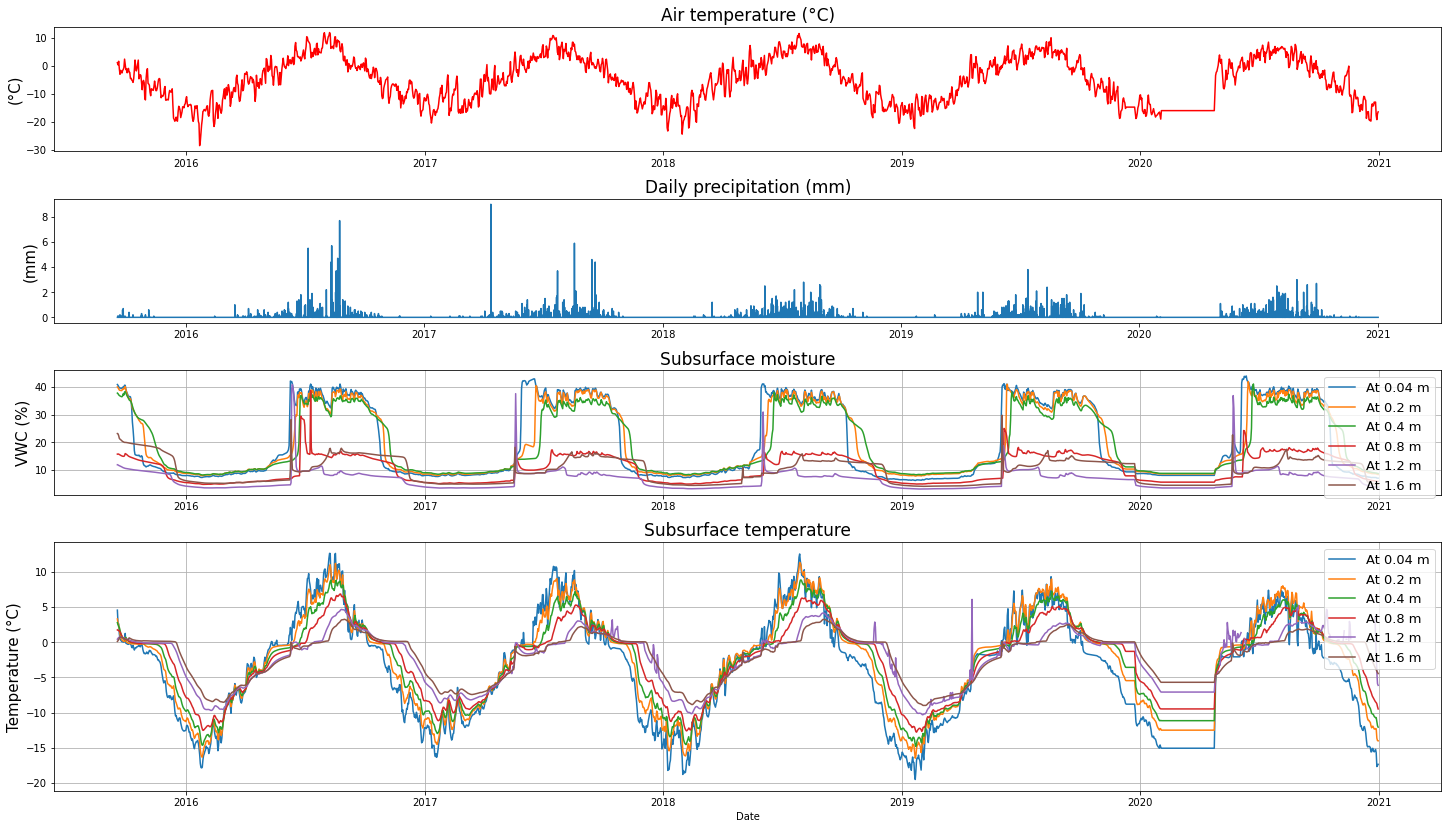

In [191]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,2,2], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[2, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])
f2_ax3 = fig2.add_subplot(spec2[0, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 0])

#plt.title('Soil moisture data - Mean hourly values (linearly interpolated for missing values)')

f2_ax1.set_title('Subsurface moisture',fontsize=17)
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='At 0.04 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='At 0.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='At 0.4 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='At 0.8 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='At 1.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='At 1.6 m')
f2_ax1.set_ylabel('VWC (%)',fontsize=15)
#f2_ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#f2_ax1.xlabel('Date')
f2_ax1.legend(loc=1,fontsize=13)
f2_ax1.grid(True)

f2_ax2.set_title('Subsurface temperature',fontsize=17)
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='At 0.04 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='At 0.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='At 0.4 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='At 0.8 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='At 1.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='At 1.6 m')
f2_ax2.set_ylabel('Temperature (°C)',fontsize=15)
#f2_ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
f2_ax2.set_xlabel('Date')
f2_ax2.legend(loc=1,fontsize=13)
f2_ax2.grid(True)

f2_ax3.set_title('Air temperature (°C)',fontsize=17)
f2_ax3.plot(data_AWS_syn['Air temperature at 5 m (°C)'],'r')
f2_ax3.set_ylabel('(°C)',fontsize=15)



f2_ax4.set_title('Daily precipitation (mm)',fontsize=17)
f2_ax4.plot(data_AWS_prep['Precipitation at 10 m (mm)'])
f2_ax4.set_ylabel('(mm)',fontsize=15)


#plt.savefig('met_data.png',dpi=300,bbox_inches='tight')

### Reducing the data to the year 2017

In [192]:
data_AWS_syn_2017 = data_AWS_syn.loc['2017']

# Changing the units of temperature to Kelvin

data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.04 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.4 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.8 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.6 m (°C)'] + 273.15

#### Plotting the simulated [with different alpha values] and measured data - Peat
1. Subsurface temperature data and moisture data

In [193]:
data_AWS_syn_2017.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=365, freq='D')

Text(0, 0.5, 'Temperature (K)')

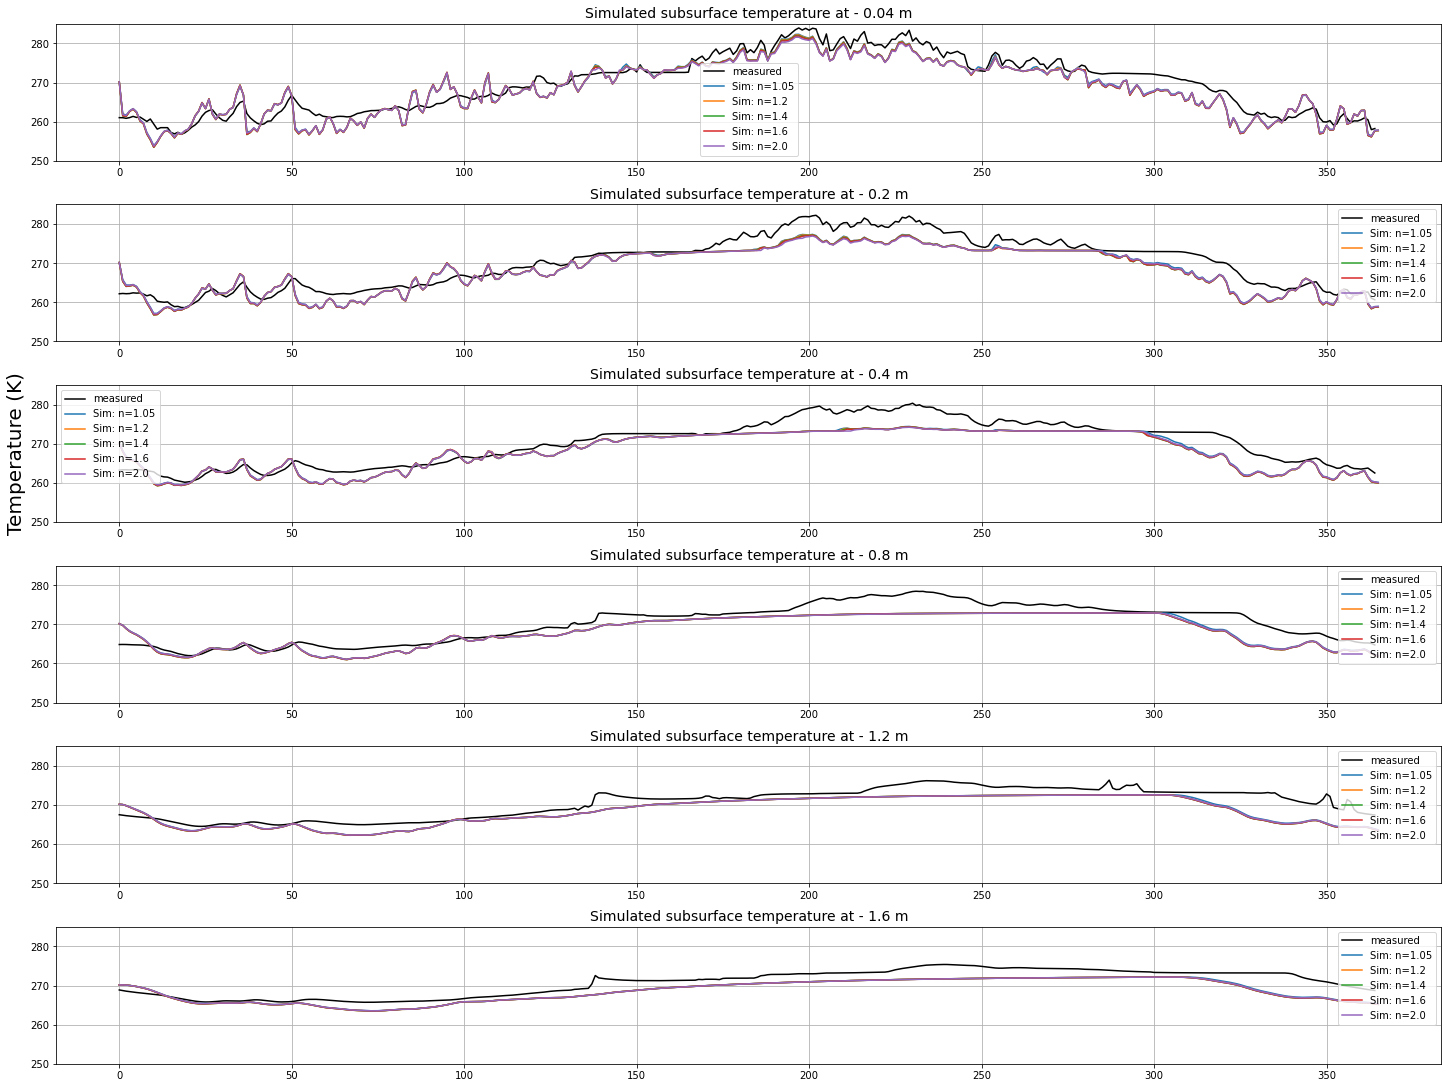

In [194]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Pn1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    for i, values in enumerate(P_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Pn{i+1}"][f'point -{depth} temperature [K]'], label=f'Sim: n={values}')
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

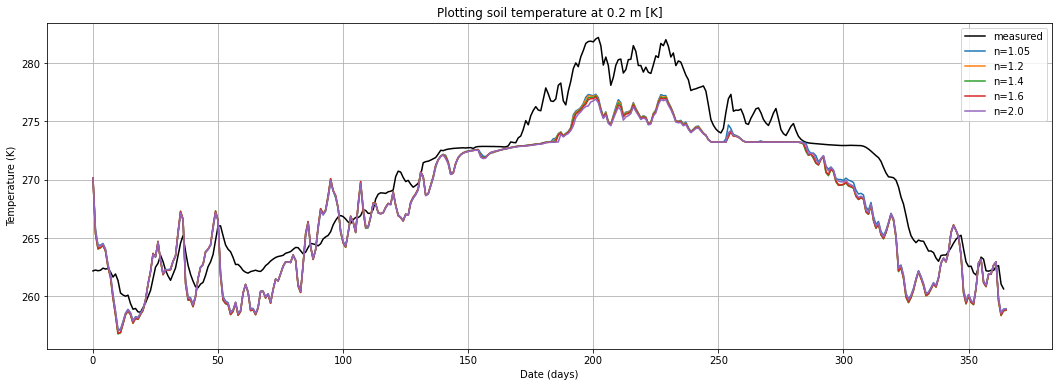

In [195]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting soil temperature at 0.2 m [K]')




time_period = df_Palpha1.index

plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - 0.2 m (K)'], 'k', label='measured')

for i, values in enumerate(P_n_values):
    plt.plot(locals()[f"df_Pn{i+1}"]['point -0.2 temperature [K]'], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### Plotting the subsurface moisture for different n values at different depths

Text(0, 0.5, 'VWC (%)')

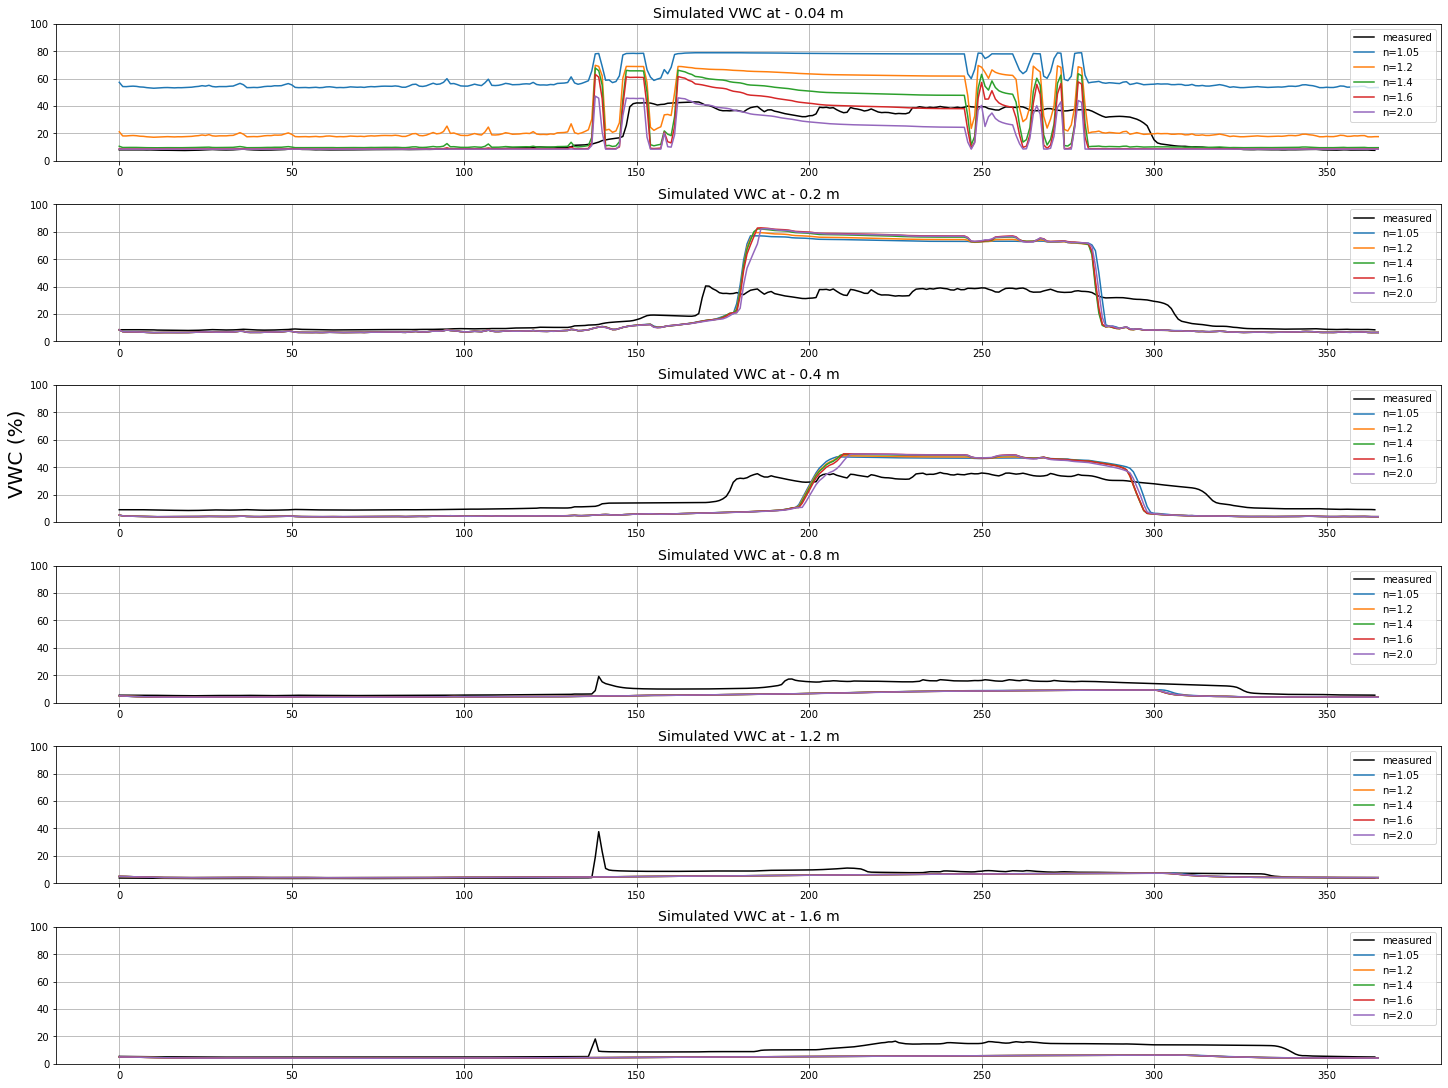

In [196]:
### Plotting the subsurface moisture for different n values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Pn1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    for i, values in enumerate(P_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Pn{i+1}"][f'Soil moisture at - {depth} m (VWC %)'], label=f'n={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated VWC at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,100.0)
    

f2_ax3.set_ylabel('VWC (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

* Comments:
  

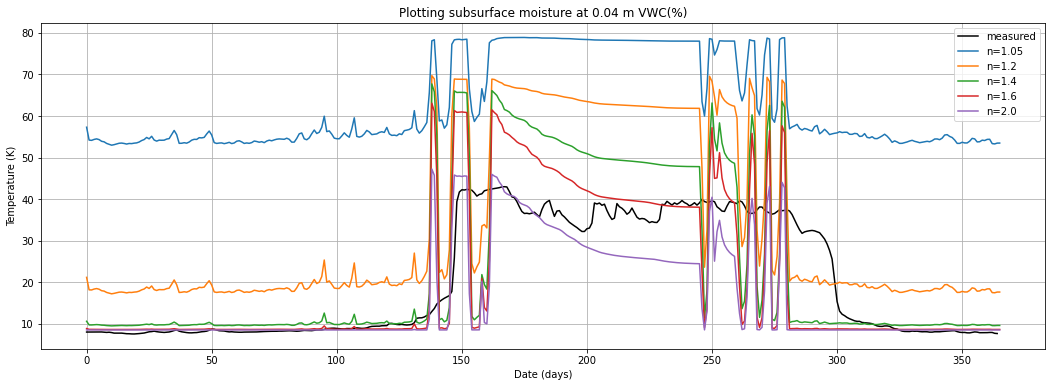

In [197]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting subsurface moisture at 0.04 m VWC(%)')


time_period = df_Pn1.index


plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - 0.04 m (%)'], 'k', label='measured')

for i, values in enumerate(P_n_values):
    plt.plot(locals()[f"df_Pn{i+1}"]['Soil moisture at - 0.04 m (VWC %)'], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

* Comments:
    - It is observed that the measured VWC is often at a lower moisture content level that the simulated results. (Probably the soil is too porous - assume lesser porosity?)
    - The variations observed in the simulated VWC (especially the top levels) seem to have a increased it's moisture content during the summer and remains to be a plateau during the summer (A steady water flow or storage is maintained).
    - The moisture increase is seen earlier in the model - It might be that snowmelt has taken place which increased the moisture.

In [198]:
# Converting the index of observation dataframe:

df_simulated = df_Pn1.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index

df_simulated_2017.head()

time [s]  water content [mol]  point -0.01 temperature [K]  \
TIMESTAMP                                                                
2017-01-01       0.0         1.156097e+06                   270.150000   
2017-01-02   86400.0         1.156097e+06                   260.845126   
2017-01-03  172800.0         1.156097e+06                   260.928142   
2017-01-04  259200.0         1.156097e+06                   262.399472   
2017-01-05  345600.0         1.156097e+06                   263.052623   

            point -0.04 temperature [K]  point -0.1 temperature [K]  \
TIMESTAMP                                                             
2017-01-01                   270.150000                  270.150000   
2017-01-02                   261.997542                  263.600510   
2017-01-03                   261.669183                  262.757432   
2017-01-04                   262.762641                  263.358029   
2017-01-05                   263.330218                  263.771455   

            point -0.2 temperature [K]  point -0.4 temperature [K]  \
TIMESTAMP                                                            
2017-01-01                  270.150000                  270.150000   
2017-01-02                  265.785514                  268.243141   
2017-01-03                  264.402392                  266.722686   
2017-01-04                  264.378050                  266.097405   
2017-01-05                  264.526366                  265.860949   

            point -0.8 temperature [K]  point -1.2 temperature [K]  \
TIMESTAMP                                                            
2017-01-01                  270.150000                  270.150000   
2017-01-02                  269.790619                  270.094160   
2017-01-03                  268.999143                  269.835667   
2017-01-04                  268.321975                  269.489874   
2017-01-05                  267.842428                  269.139376   

            point -1.6 temperature [K]  ...  point -1.6 saturation ice  \
TIMESTAMP                               ...                              
2017-01-01                  270.150000  ...                   0.900467   
2017-01-02                  270.146231  ...                   0.900492   
2017-01-03                  270.106135  ...                   0.900754   
2017-01-04                  270.023811  ...                   0.901277   
2017-01-05                  269.904674  ...                   0.902000   

            point -5.0 saturation ice  point -10.0 saturation ice  \
TIMESTAMP                                                           
2017-01-01                   0.949996                    0.949996   
2017-01-02                   0.949996                    0.949996   
2017-01-03                   0.949996                    0.949996   
2017-01-04                   0.949996                    0.949996   
2017-01-05                   0.949996                    0.949996   

            time [days]  Soil moisture at - 0.04 m (VWC %)  \
TIMESTAMP                                                    
2017-01-01          0.0                          57.293030   
2017-01-02          1.0                          54.196751   
2017-01-03          2.0                          54.130762   
2017-01-04          3.0                          54.358839   
2017-01-05          4.0                          54.487456   

            Soil moisture at - 0.2 m (VWC %)  \
TIMESTAMP                                      
2017-01-01                          8.460275   
2017-01-02                          7.190554   
2017-01-03                          6.995297   
2017-01-04                          6.992255   
2017-01-05                          7.010980   

            Soil moisture at - 0.4 m (VWC %)  \
TIMESTAMP                                      
2017-01-01                          4.976632   
2017-01-02                          4.534389   
2017-01-03                          4.326379  

Comments:
    -

### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

In [199]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

### Finding the yearly RMSE value for the individual parameters:
1. Find the RMSE value for the simulated and measured results. 
2. For one particular parameter - You will have 30 RMSE values {5 parameter values at 6 depths} - We can plot 'n Vs RMSE' at the six depths in one plot. 
3. Keeping Step 2 in mind: Similarly we can calculate it for the three parameters: n, n, wr - We can plot this in three subfigures.
4. We also have three materials which can be plotted in three figures.

In [200]:
len(df_Pn1['point -0.04 temperature [K]'][1:])

365

In [201]:
# Test
## Step 1 - Find the RMSE value for the simulated and measured results.

# Simulated results: (Excluding the initial value at T = 0)
sim = df_Pn5['point -1.6 temperature [K]'][1:].values

# Measurements
measured = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'].values

RMSE_test = np.sqrt(((sim - measured) ** 2).mean())

RMSE_test

2.4277948360795207

In [202]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = n
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

RMSE_Pn_temp = pd.DataFrame(index=depths, columns=P_n_values)
RMSE_Pn_mois = pd.DataFrame(index=depths, columns=P_n_values)
RMSE_Pn_temp

1.05 1.20 1.40 1.60 2.00
0.04  NaN  NaN  NaN  NaN  NaN
0.20  NaN  NaN  NaN  NaN  NaN
0.40  NaN  NaN  NaN  NaN  NaN
0.80  NaN  NaN  NaN  NaN  NaN
1.20  NaN  NaN  NaN  NaN  NaN
1.60  NaN  NaN  NaN  NaN  NaN

In [204]:
# P - Peat
for j, depth in enumerate(depths):
    for k in range(len(P_n_values)):
        
        # Simulated value
        sim_temp = locals()['df_Pn'+str(k+1)][f'point -{depth} temperature [K]'][1:].values
        sim_mois = locals()['df_Pn'+str(k+1)][f'Soil moisture at - {depth} m (VWC %)'][1:].values
        # Measured value
        measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'].values
        measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'].values
        
        # Determining the RMSE value
        RMSE_Pn_temp.iloc[j,k] = np.sqrt(((sim_temp - measured_temp) ** 2).mean())
        RMSE_Pn_mois.iloc[j,k] = np.sqrt(((sim_mois - measured_mois) ** 2).mean())


In [205]:
# Changing the datatype to float64
RMSE_Pn_temp = RMSE_Pn_temp.astype('float64')
RMSE_Pn_mois = RMSE_Pn_mois.astype('float64')

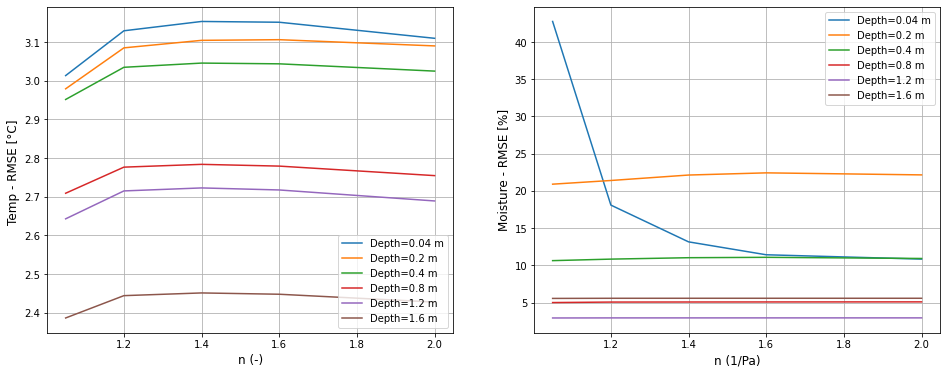

In [206]:

# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Pn_temp.index):
    ax1.plot(RMSE_Pn_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Pn_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('n (-)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('n (1/Pa)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

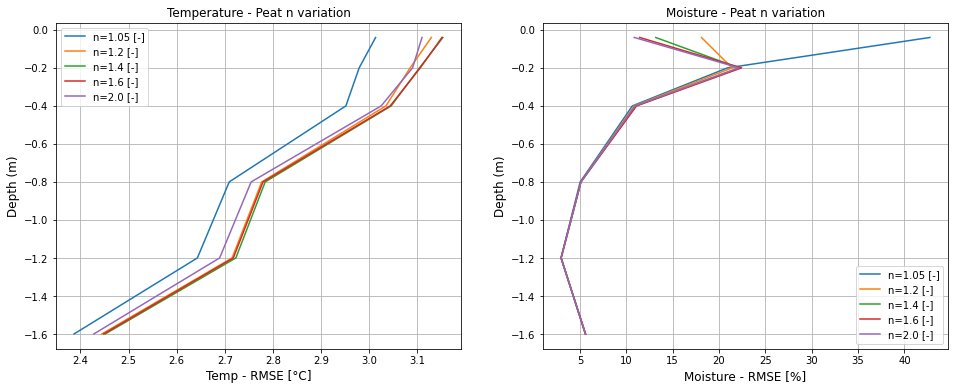

In [207]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
ax1.set_title('Temperature - Peat n variation')
ax2.set_title('Moisture - Peat n variation')

for i, values in enumerate(RMSE_Pn_temp.columns):
    ax1.plot(RMSE_Pn_temp.iloc[:,i].values, - RMSE_Pn_temp.index, label=f'n={values} [-]')
    ax2.plot(RMSE_Pn_mois.iloc[:,i].values, - RMSE_Pn_mois.index, label=f'n={values} [-]')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C]', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
- The temperature RMSE value increases with the increase in n value.
- The moisture RMSE value remains more or less constant except at depth of 0.04 m. Here a greater n value is preferred.

In [208]:
RMSE_Pn_mois

1.05       1.20       1.40       1.60       2.00
0.04  42.748654  18.096790  13.162462  11.429238  10.848120
0.20  20.906445  21.400474  22.131883  22.425153  22.152141
0.40  10.641160  10.844569  11.034333  11.085890  10.931281
0.80   5.013602   5.078778   5.088006   5.094273   5.104935
1.20   2.943891   2.953483   2.954790   2.955659   2.957496
1.60   5.568792   5.587375   5.589853   5.590434   5.589392

### Mineral - n

In [218]:
M_n_values = [1.05, 1.2, 1.4, 1.6, 2.0]

##### Plotting the temperature for different n values at different depths

#### Plotting the simulated [with different n values] and measured data - Peat
1. Subsurface temperature data and moisture data

In [219]:
data_AWS_syn_2017.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=365, freq='D')

Text(0, 0.5, 'Temperature (K)')

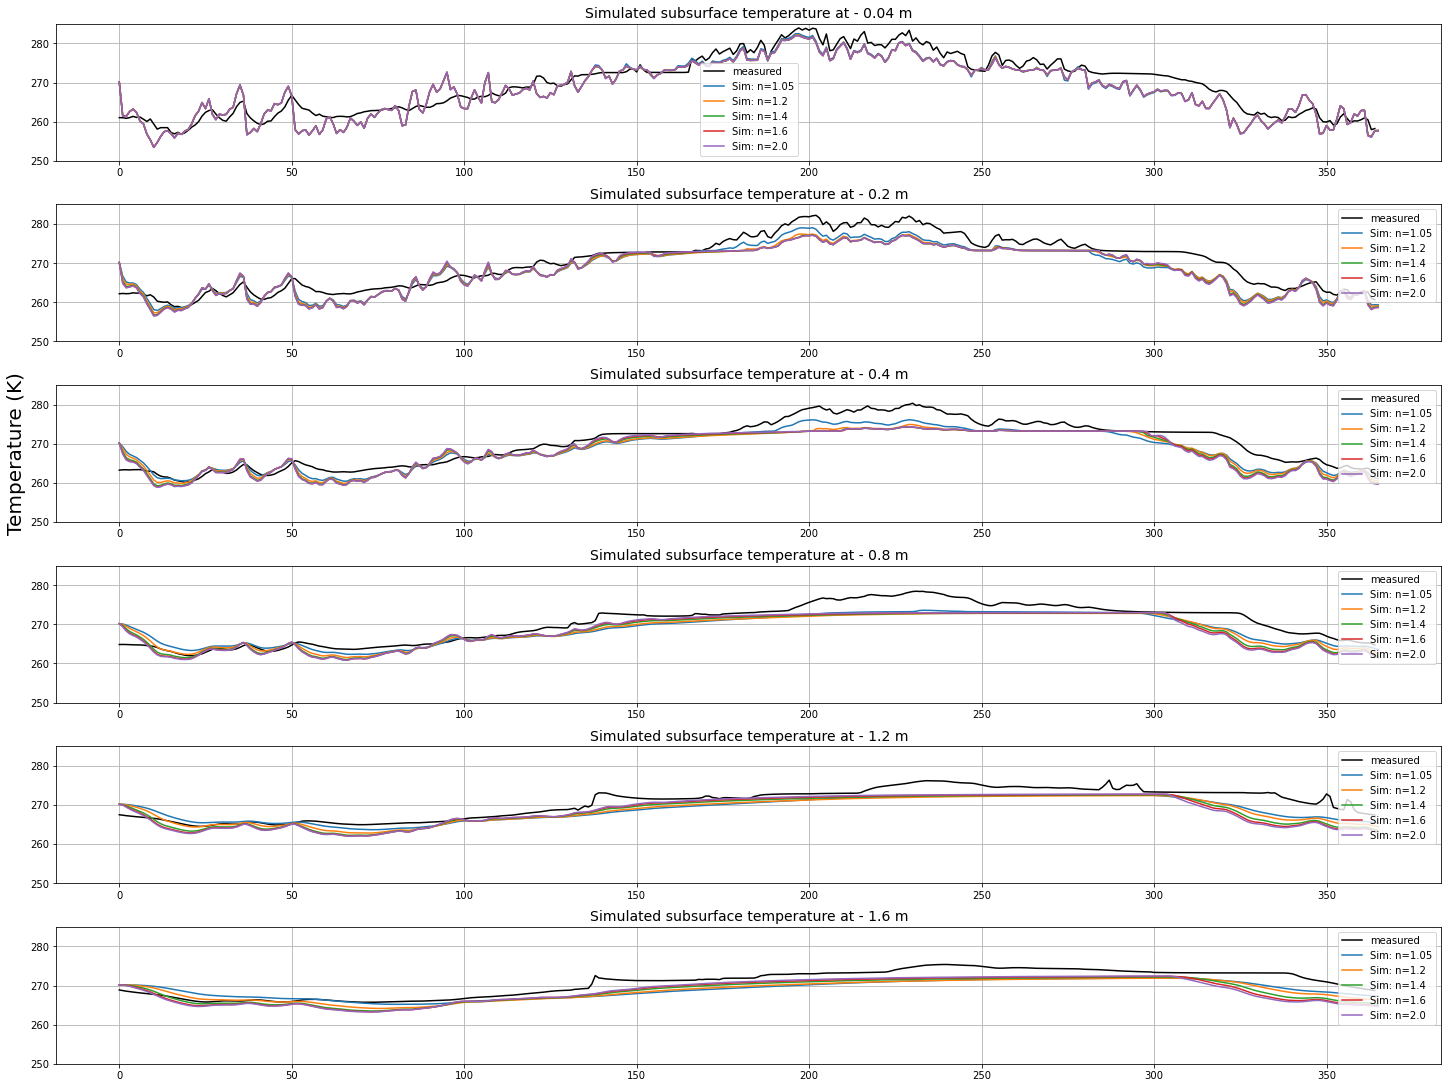

In [220]:
### Plotting the temperature for different n values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Pn1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    for i, values in enumerate(M_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Mn{i+1}"][f'point -{depth} temperature [K]'], label=f'Sim: n={values}')
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

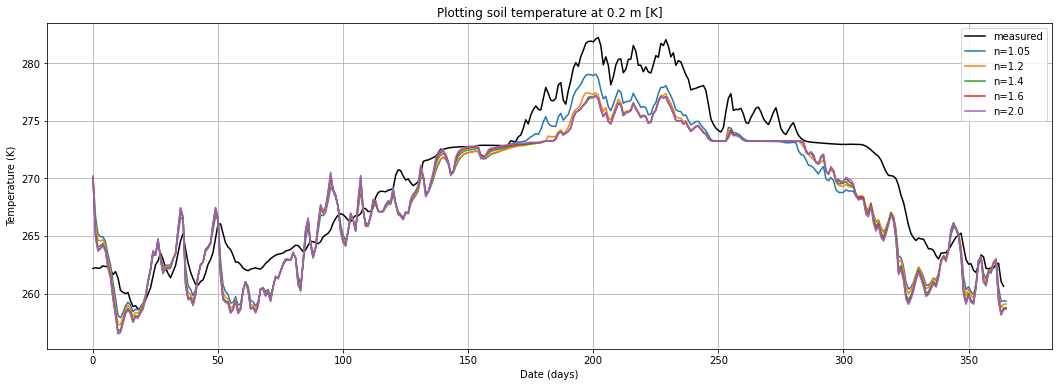

In [221]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting soil temperature at 0.2 m [K]')




time_period = df_Pn1.index

plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - 0.2 m (K)'], 'k', label='measured')

for i, values in enumerate(M_n_values):
    plt.plot(locals()[f"df_Mn{i+1}"]['point -0.2 temperature [K]'], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### Plotting the subsurface moisture for different n values at different depths

Text(0, 0.5, 'VWC (%)')

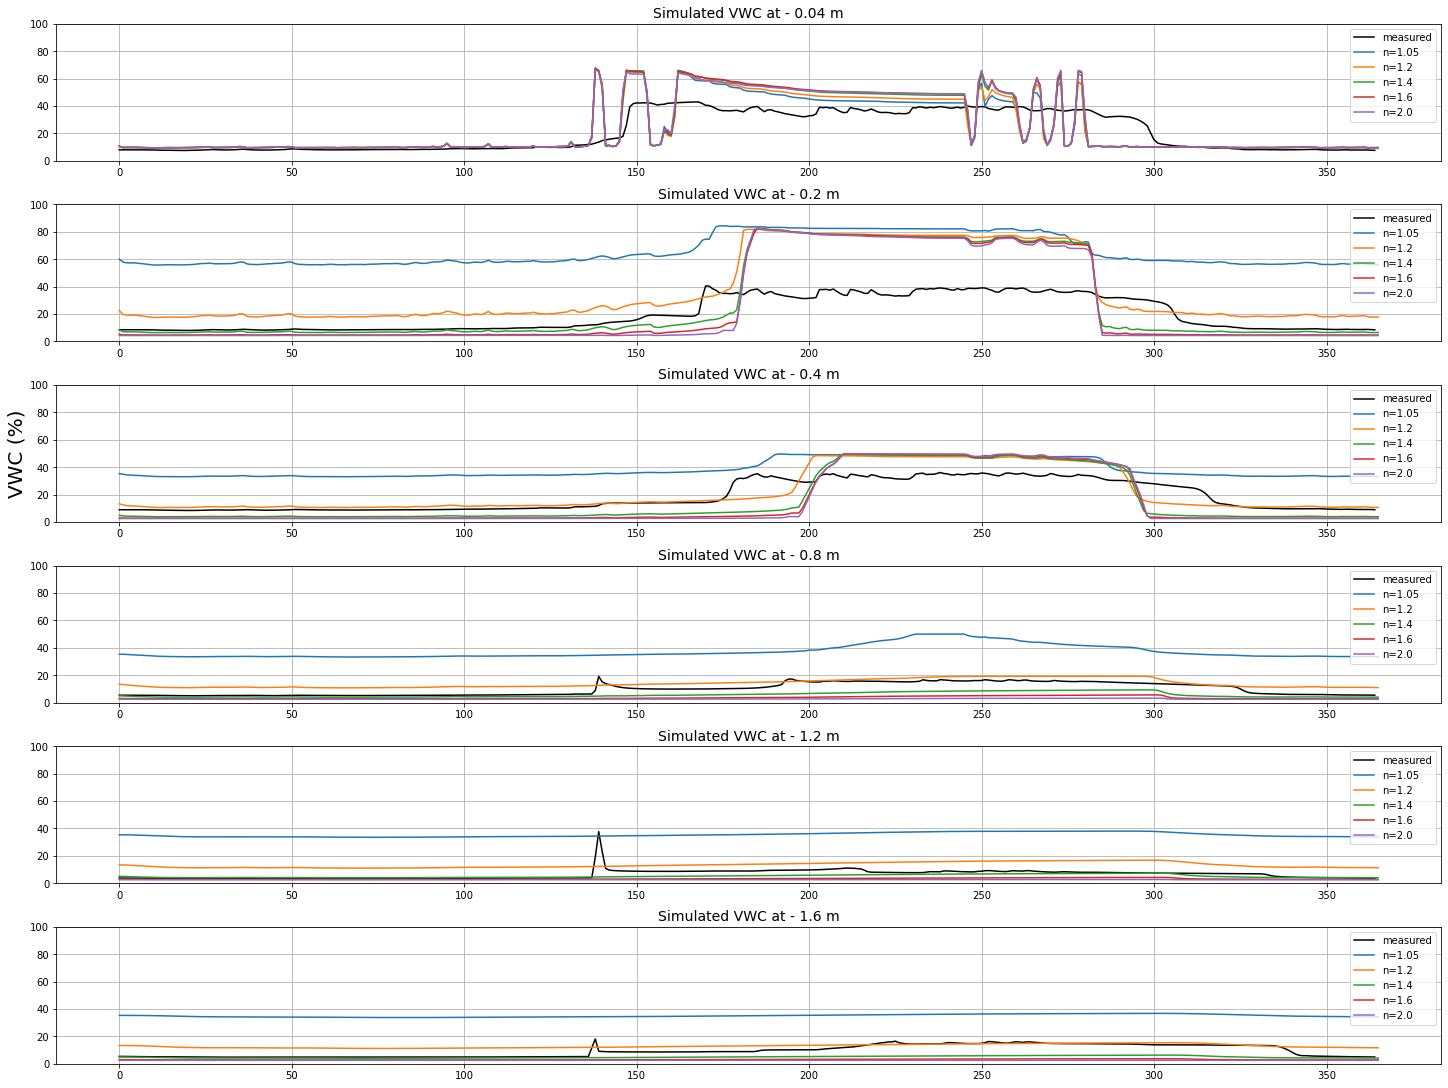

In [222]:
### Plotting the subsurface moisture for different n values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Pn1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    for i, values in enumerate(M_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Mn{i+1}"][f'Soil moisture at - {depth} m (VWC %)'], label=f'n={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated VWC at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,100.0)
    

f2_ax3.set_ylabel('VWC (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

* Comments:


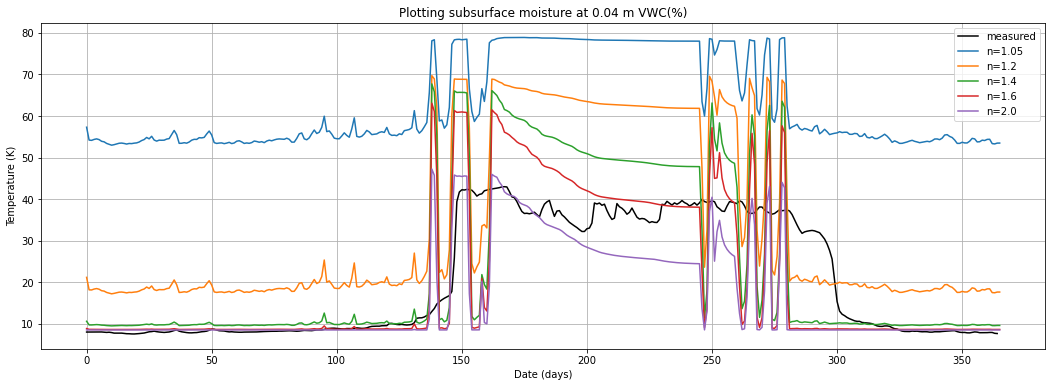

In [223]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting subsurface moisture at 0.04 m VWC(%)')


time_period = df_Pn1.index


plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - 0.04 m (%)'], 'k', label='measured')

for i, values in enumerate(M_n_values):
    plt.plot(locals()[f"df_Pn{i+1}"]['Soil moisture at - 0.04 m (VWC %)'], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

* Comments:


In [224]:
# Converting the index of observation dataframe:

df_simulated = df_Pn1.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index

df_simulated_2017.head()

time [s]  water content [mol]  point -0.01 temperature [K]  \
TIMESTAMP                                                                
2017-01-01       0.0         1.156097e+06                   270.150000   
2017-01-02   86400.0         1.156097e+06                   260.845126   
2017-01-03  172800.0         1.156097e+06                   260.928142   
2017-01-04  259200.0         1.156097e+06                   262.399472   
2017-01-05  345600.0         1.156097e+06                   263.052623   

            point -0.04 temperature [K]  point -0.1 temperature [K]  \
TIMESTAMP                                                             
2017-01-01                   270.150000                  270.150000   
2017-01-02                   261.997542                  263.600510   
2017-01-03                   261.669183                  262.757432   
2017-01-04                   262.762641                  263.358029   
2017-01-05                   263.330218                  263.771455   

            point -0.2 temperature [K]  point -0.4 temperature [K]  \
TIMESTAMP                                                            
2017-01-01                  270.150000                  270.150000   
2017-01-02                  265.785514                  268.243141   
2017-01-03                  264.402392                  266.722686   
2017-01-04                  264.378050                  266.097405   
2017-01-05                  264.526366                  265.860949   

            point -0.8 temperature [K]  point -1.2 temperature [K]  \
TIMESTAMP                                                            
2017-01-01                  270.150000                  270.150000   
2017-01-02                  269.790619                  270.094160   
2017-01-03                  268.999143                  269.835667   
2017-01-04                  268.321975                  269.489874   
2017-01-05                  267.842428                  269.139376   

            point -1.6 temperature [K]  ...  point -1.6 saturation ice  \
TIMESTAMP                               ...                              
2017-01-01                  270.150000  ...                   0.900467   
2017-01-02                  270.146231  ...                   0.900492   
2017-01-03                  270.106135  ...                   0.900754   
2017-01-04                  270.023811  ...                   0.901277   
2017-01-05                  269.904674  ...                   0.902000   

            point -5.0 saturation ice  point -10.0 saturation ice  \
TIMESTAMP                                                           
2017-01-01                   0.949996                    0.949996   
2017-01-02                   0.949996                    0.949996   
2017-01-03                   0.949996                    0.949996   
2017-01-04                   0.949996                    0.949996   
2017-01-05                   0.949996                    0.949996   

            time [days]  Soil moisture at - 0.04 m (VWC %)  \
TIMESTAMP                                                    
2017-01-01          0.0                          57.293030   
2017-01-02          1.0                          54.196751   
2017-01-03          2.0                          54.130762   
2017-01-04          3.0                          54.358839   
2017-01-05          4.0                          54.487456   

            Soil moisture at - 0.2 m (VWC %)  \
TIMESTAMP                                      
2017-01-01                          8.460275   
2017-01-02                          7.190554   
2017-01-03                          6.995297   
2017-01-04                          6.992255   
2017-01-05                          7.010980   

            Soil moisture at - 0.4 m (VWC %)  \
TIMESTAMP                                      
2017-01-01                          4.976632   
2017-01-02                          4.534389   
2017-01-03                          4.326379  

Comments:
    -

### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

In [225]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

### Finding the yearly RMSE value for the individual parameters:
1. Find the RMSE value for the simulated and measured results. 
2. For one particular parameter - You will have 30 RMSE values {5 parameter values at 6 depths} - We can plot 'n Vs RMSE' at the six depths in one plot. 
3. Keeping Step 2 in mind: Similarly we can calculate it for the three parameters: n, n, wr - We can plot this in three subfigures.
4. We also have three materials which can be plotted in three figures.

In [226]:
len(df_Pn1['point -0.04 temperature [K]'][1:])

365

In [227]:
# Test
## Step 1 - Find the RMSE value for the simulated and measured results.

# Simulated results: (Excluding the initial value at T = 0)
sim = df_Mn5['point -1.6 temperature [K]'][1:].values

# Measurements
measured = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'].values

RMSE_test = np.sqrt(((sim - measured) ** 2).mean())

RMSE_test

2.5872097211579734

In [228]:
M_n_values

[1.05, 1.2, 1.4, 1.6, 2.0]

In [229]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = n
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]
RMSE_Mn_temp = pd.DataFrame(index=depths, columns=M_n_values)
RMSE_Mn_mois = pd.DataFrame(index=depths, columns=M_n_values)
RMSE_Mn_temp

1.05 1.20 1.40 1.60 2.00
0.04  NaN  NaN  NaN  NaN  NaN
0.20  NaN  NaN  NaN  NaN  NaN
0.40  NaN  NaN  NaN  NaN  NaN
0.80  NaN  NaN  NaN  NaN  NaN
1.20  NaN  NaN  NaN  NaN  NaN
1.60  NaN  NaN  NaN  NaN  NaN

In [230]:
# Mineral
for j, depth in enumerate(depths):
    for k in range(len(M_n_values)):
        
        # Simulated value
        sim_temp = locals()['df_Mn'+str(k+1)][f'point -{depth} temperature [K]'][1:].values
        sim_mois = locals()['df_Mn'+str(k+1)][f'Soil moisture at - {depth} m (VWC %)'][1:].values
        
        # Measured value
        measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'].values
        measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'].values
        
        # Determining the RMSE value
        RMSE_Mn_temp.iloc[j,k] = np.sqrt(((sim_temp - measured_temp) ** 2).mean())
        RMSE_Mn_mois.iloc[j,k] = np.sqrt(((sim_mois - measured_mois) ** 2).mean())


In [231]:
# Changing the datatype to float64
RMSE_Mn_temp = RMSE_Mn_temp.astype('float64')
RMSE_Mn_mois = RMSE_Mn_mois.astype('float64')

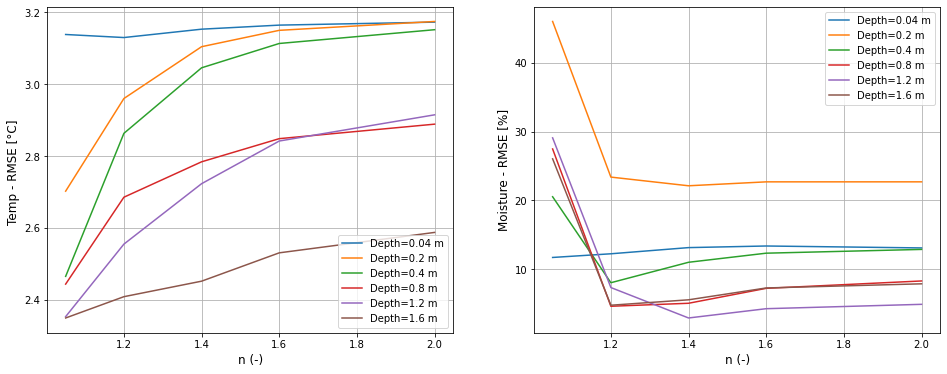

In [232]:

# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Pn_temp.index):
    ax1.plot(RMSE_Mn_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Mn_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('n (-)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('n (-)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:


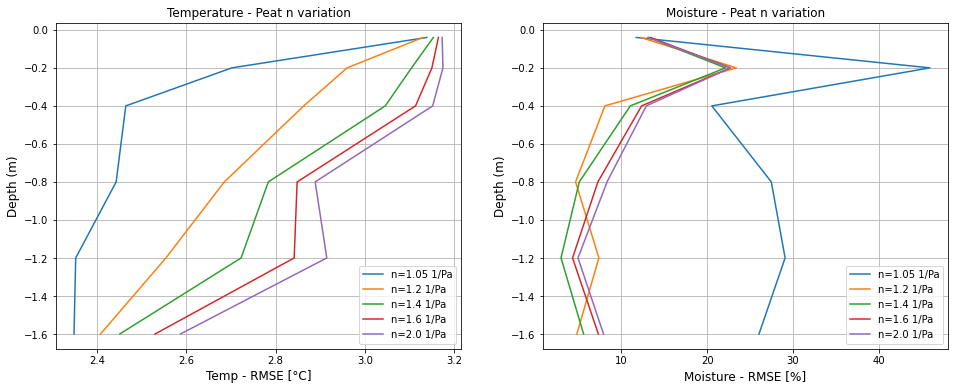

In [234]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
ax1.set_title('Temperature - Peat n variation')
ax2.set_title('Moisture - Peat n variation')

for i, values in enumerate(RMSE_Mn_temp.columns):
    ax1.plot(RMSE_Mn_temp.iloc[:,i].values, - RMSE_Mn_temp.index, label=f'n={values} 1/Pa')
    ax2.plot(RMSE_Mn_mois.iloc[:,i].values, - RMSE_Mn_mois.index, label=f'n={values} 1/Pa')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C]', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
    - **For temperature: As n value increases, the RMSE value also increases**
    - **For moisture: As n value increases, the RMSE value also decreases except for 1.05** 
    

In [235]:
RMSE_Mn_mois

1.05       1.20       1.40       1.60       2.00
0.04  11.733355  12.266486  13.162462  13.396150  13.116069
0.20  45.967981  23.391286  22.131883  22.701662  22.703478
0.40  20.539922   8.069782  11.034333  12.354366  12.901126
0.80  27.473645   4.653947   5.088006   7.254837   8.323689
1.20  29.084055   7.367713   2.954790   4.301137   4.934985
1.60  26.040330   4.805124   5.589853   7.307964   7.910113

### Bedrock - n

##### Plotting the temperature for different n values at different depths

In [240]:
B_n_values = [1.05, 1.5, 2, 2.5, 3]

#### Plotting the simulated [with different n values] and measured data - Peat
1. Subsurface temperature data and moisture data

In [241]:
data_AWS_syn_2017.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=365, freq='D')

Text(0, 0.5, 'Temperature (K)')

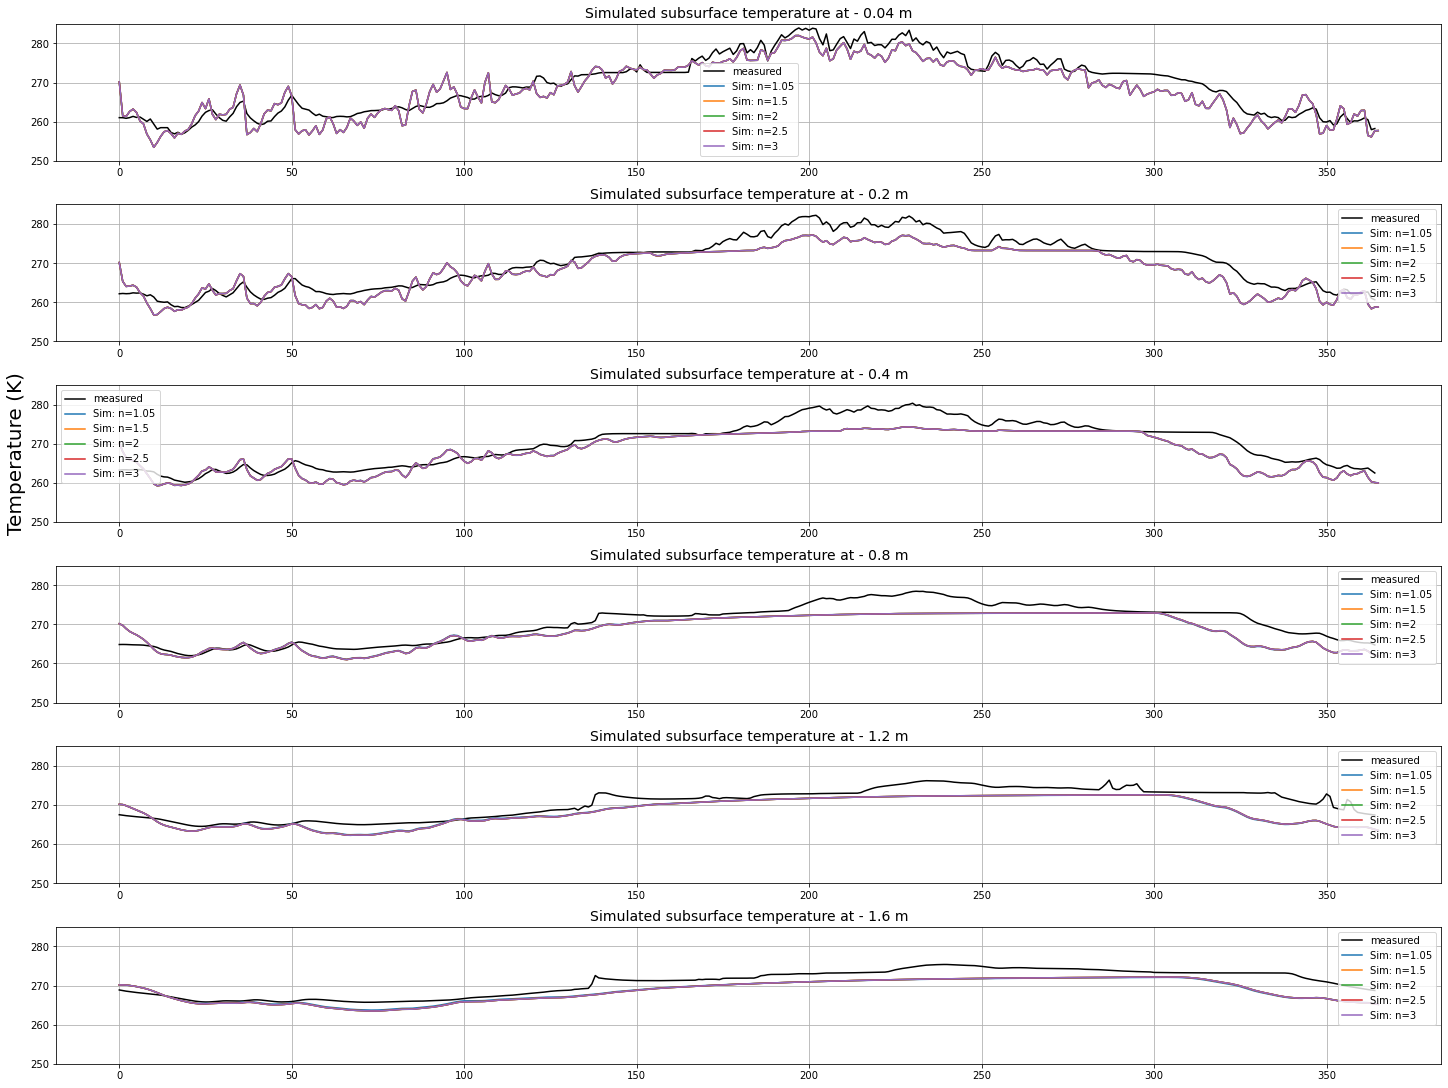

In [242]:
### Plotting the temperature for different n values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Pn1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    for i, values in enumerate(B_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Bn{i+1}"][f'point -{depth} temperature [K]'], label=f'Sim: n={values}')
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

* Comments:


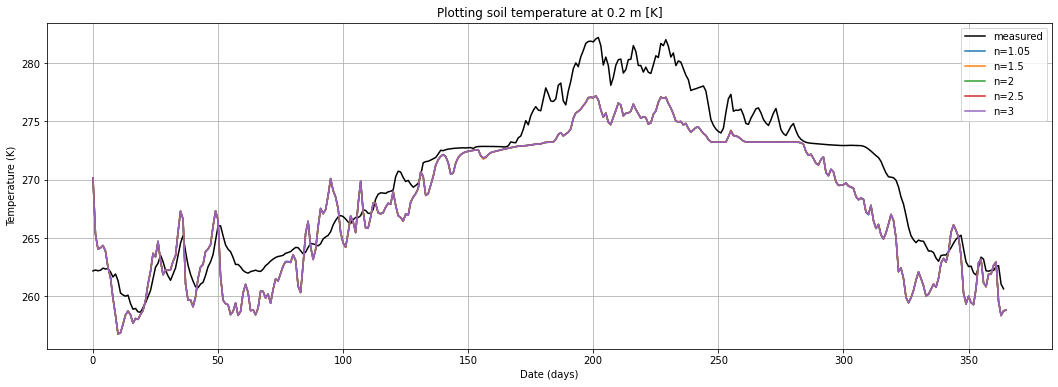

In [243]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting soil temperature at 0.2 m [K]')


time_period = df_Pn1.index

plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - 0.2 m (K)'], 'k', label='measured')

for i, values in enumerate(B_n_values):
    plt.plot(locals()[f"df_Bn{i+1}"]['point -0.2 temperature [K]'], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### Plotting the subsurface moisture for different n values at different depths

Text(0, 0.5, 'VWC (%)')

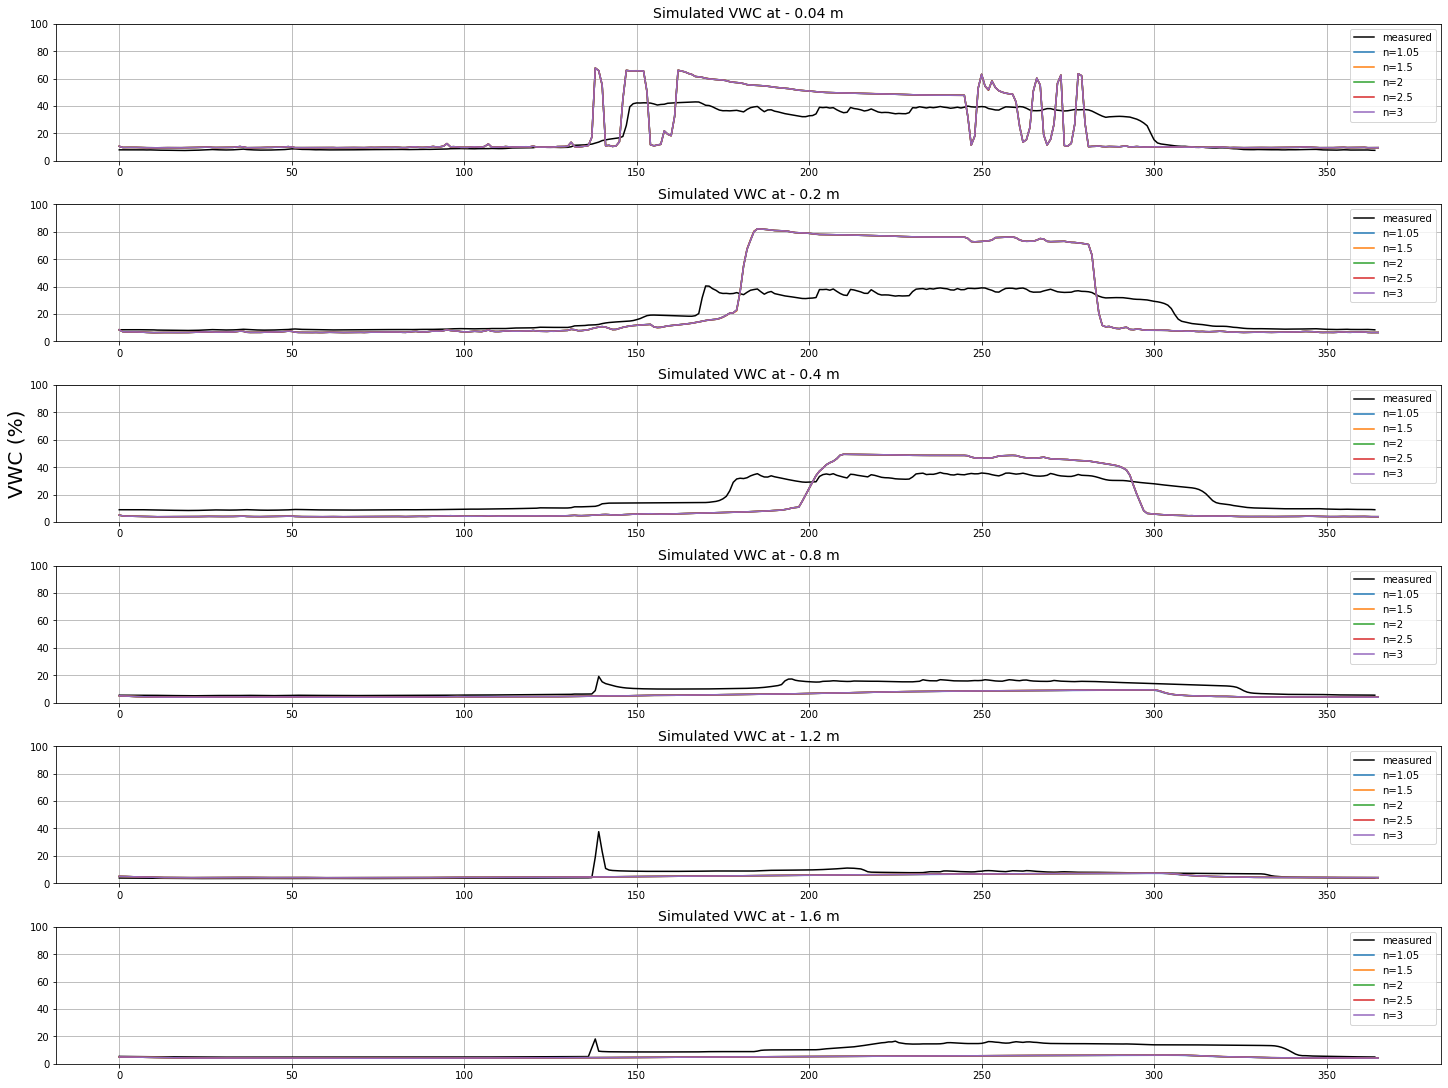

In [244]:
### Plotting the subsurface moisture for different n values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Pn1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    for i, values in enumerate(B_n_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Bn{i+1}"][f'Soil moisture at - {depth} m (VWC %)'], label=f'n={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated VWC at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,100.0)
    

f2_ax3.set_ylabel('VWC (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

* Comments:


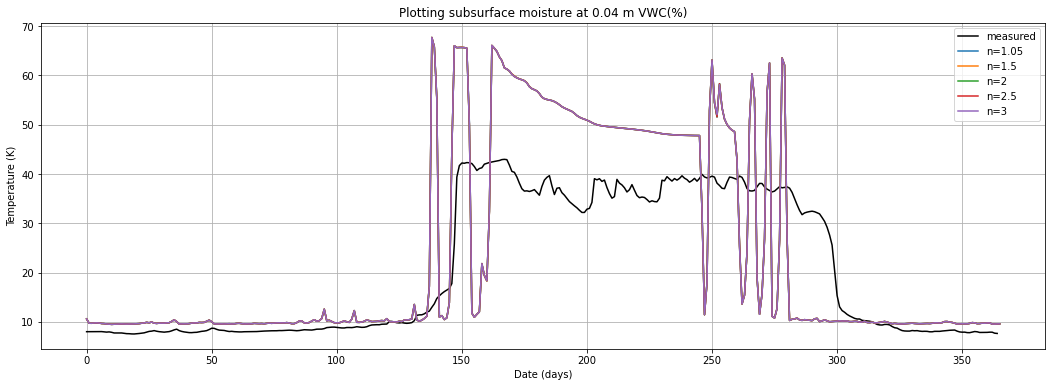

In [245]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting subsurface moisture at 0.04 m VWC(%)')


time_period = df_Pn1.index


plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - 0.04 m (%)'], 'k', label='measured')

for i, values in enumerate(B_n_values):
    plt.plot(locals()[f"df_Bn{i+1}"]['Soil moisture at - 0.04 m (VWC %)'], label=f'n={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

In [246]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

### Finding the yearly RMSE value for the individual parameters:
1. Find the RMSE value for the simulated and measured results. 
2. For one particular parameter - You will have 30 RMSE values {5 parameter values at 6 depths} - We can plot 'n Vs RMSE' at the six depths in one plot. 
3. Keeping Step 2 in mind: Similarly we can calculate it for the three parameters: n, n, wr - We can plot this in three subfigures.
4. We also have three materials which can be plotted in three figures.

In [248]:
# Test
## Step 1 - Find the RMSE value for the simulated and measured results.

# Simulated results: (Excluding the initial value at T = 0)
sim = df_Bn5['point -1.6 temperature [K]'][1:].values

# Measurements
measured = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'].values

RMSE_test = np.sqrt(((sim - measured) ** 2).mean())

RMSE_test

2.451055635482517

In [249]:
B_n_values

[1.05, 1.5, 2, 2.5, 3]

In [250]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = n
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]
RMSE_Bn_temp = pd.DataFrame(index=depths, columns=B_n_values)
RMSE_Bn_mois = pd.DataFrame(index=depths, columns=B_n_values)
RMSE_Bn_temp

1.05 1.50 2.00 2.50 3.00
0.04  NaN  NaN  NaN  NaN  NaN
0.20  NaN  NaN  NaN  NaN  NaN
0.40  NaN  NaN  NaN  NaN  NaN
0.80  NaN  NaN  NaN  NaN  NaN
1.20  NaN  NaN  NaN  NaN  NaN
1.60  NaN  NaN  NaN  NaN  NaN

In [251]:
# Mineral
for j, depth in enumerate(depths):
    for k in range(len(M_n_values)):
        
        # Simulated value
        sim_temp = locals()['df_Bn'+str(k+1)][f'point -{depth} temperature [K]'][1:].values
        sim_mois = locals()['df_Bn'+str(k+1)][f'Soil moisture at - {depth} m (VWC %)'][1:].values
        
        # Measured value
        measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'].values
        measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'].values
        
        # Determining the RMSE value
        RMSE_Bn_temp.iloc[j,k] = np.sqrt(((sim_temp - measured_temp) ** 2).mean())
        RMSE_Bn_mois.iloc[j,k] = np.sqrt(((sim_mois - measured_mois) ** 2).mean())


In [252]:
# Changing the datatype to float64
RMSE_Bn_temp = RMSE_Bn_temp.astype('float64')
RMSE_Bn_mois = RMSE_Bn_mois.astype('float64')

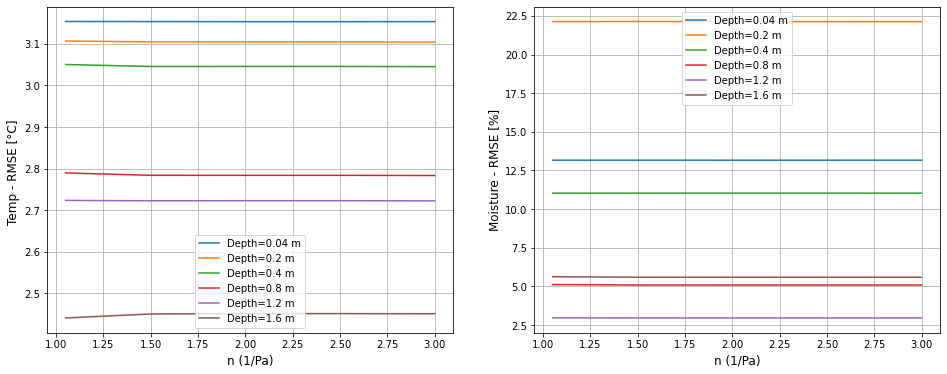

In [253]:

# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Bn_temp.index):
    ax1.plot(RMSE_Bn_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Bn_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('n (1/Pa)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('n (1/Pa)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:

    * No influence of bedrock parameters are observed!

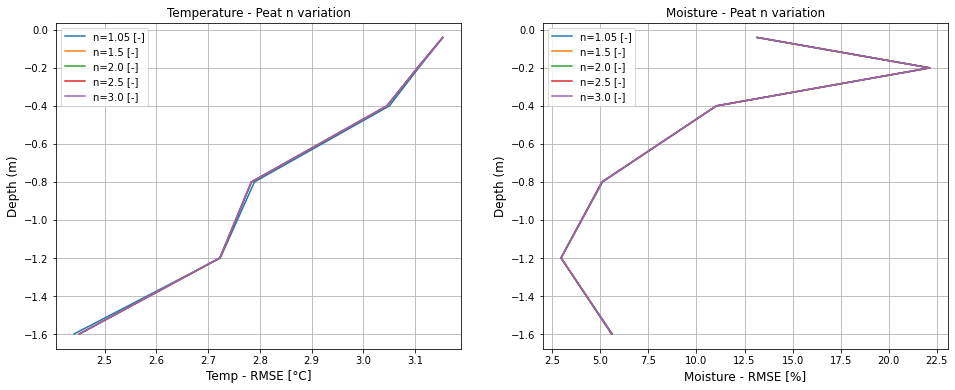

In [258]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
ax1.set_title('Temperature - Peat n variation')
ax2.set_title('Moisture - Peat n variation')

for i, values in enumerate(RMSE_Bn_temp.columns):
    ax1.plot(RMSE_Bn_temp.iloc[:,i].values, - RMSE_Bn_temp.index, label=f'n={values} [-]')
    ax2.plot(RMSE_Bn_mois.iloc[:,i].values, - RMSE_Bn_mois.index, label=f'n={values} [-]')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C]', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
    **No influence of B_n is observed - We can assume an n = 1.05 as Bedrock is considered porous**
    